In [1]:
%matplotlib inline

In [2]:
# Steps:
#  -> Design a basic grid search in the parameter space.
#  -> Iterate through the grid and check the loss/score function
#  at each point in the parameter space for the datasets.
#  -> Choose the point in the parameter space that minimizes or
#  maximizes the evaluation function.

In [3]:
from sklearn import datasets

In [4]:
X, y = datasets.make_classification(n_samples=2000, n_features=10)

In [5]:
criteria = {'gini', 'entropy'}

In [6]:
max_features = {'auto', 'log2', None}
import itertools as it

In [22]:
parameter_space = it.product(criteria, max_features)

In [23]:
import numpy as np
train_set = np.random.choice([True, False], size=len(y))

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
accuracies = {}
for criterion, max_feature in parameter_space:
    dt = DecisionTreeClassifier(criterion=criterion,
                                max_features=max_feature)
    dt.fit(X[train_set], y[train_set])
    accuracies[(criterion, max_feature)] = (dt.predict(X[~train_set])
                                             == y[~train_set]).mean()

In [26]:
len(accuracies)

6

In [27]:
from matplotlib import pyplot as plt
from matplotlib import cm

<matplotlib.colorbar.Colorbar instance at 0x10b18f290>

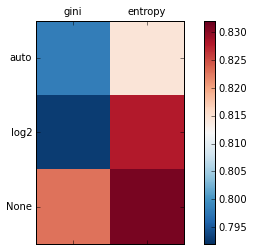

In [28]:
cmap = cm.RdBu_r
f, ax = plt.subplots(figsize=(7,4))
ax.set_xticklabels([''] + list(criteria))
ax.set_yticklabels([''] + list(max_features))
plot_array = []
for max_feature in max_features:
    m = []
    for criterion in criteria:
        m.append(accuracies[(criterion, max_feature)])
    plot_array.append(m)

colors = ax.matshow(plot_array, vmin=np.min(accuracies.values()) -
                    0.001, vmax=np.max(accuracies.values()) + 0.001,
                    cmap=cmap)
f.colorbar(colors)